# Agriculture Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import os

In [2]:
AG_train=pd.read_csv('train_agriculture.csv')

In [3]:
AG_train.shape

(4599, 10)

In [4]:
AG_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
AG_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


ID is the only attribute which has character all the other attributes are numerical

In [6]:
AG_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

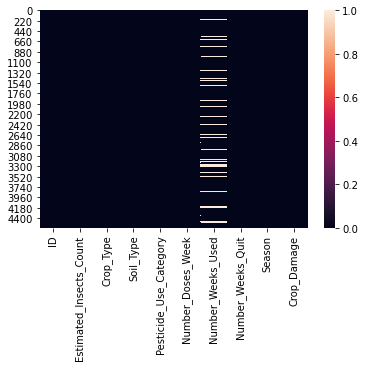

In [7]:
sns.heatmap(AG_train.isnull())

In [8]:
AG_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [9]:
AG_train.Estimated_Insects_Count.unique()

array([ 188,  209,  257,  342,  448,  577,  731, 1132, 1212, 1575, 1785,
       2138, 2401, 2999, 3516, 3895, 4096,  150,  151,  168,  232,  231,
        256,  283,  312,  311,  375,  411,  410,  488,  489,  531,  626,
        625,  677,  732,  789,  790,  851,  850,  915,  916,  984, 1056,
       1296, 1297, 1385, 1478, 1576, 1678, 1786, 1898, 2015, 2016, 2139,
       2267, 2402, 2542, 2541, 2688, 2687, 2840, 3164, 3165, 3336, 3337,
       3702, 3896,  169, 3515, 4097], dtype=int64)

In [10]:
AG_train.Estimated_Insects_Count.nunique()

71

In [11]:
AG_train.Crop_Type.unique()

array([1, 0], dtype=int64)

In [12]:
AG_train.Soil_Type.unique()

array([0, 1], dtype=int64)

In [13]:
AG_train.Pesticide_Use_Category.unique()

array([1, 3, 2], dtype=int64)

In [14]:
AG_train.Number_Doses_Week.unique()

array([ 0, 30, 40, 60, 20, 25, 45, 50, 15, 10,  5, 35, 70, 55, 80, 90, 85,
       65, 75, 95], dtype=int64)

In [15]:
AG_train.Number_Weeks_Used.unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [16]:
AG_train.Number_Weeks_Quit.unique()

array([ 0,  1,  9,  4, 13,  3, 14,  6,  2, 12, 15, 10,  8, 11,  7,  5, 17,
       18, 16, 20, 21, 19, 22, 24, 23, 27, 25, 28, 26, 29, 30, 31, 33, 32,
       36, 37, 34, 39, 44, 41, 35, 47, 46, 40, 42, 38, 43], dtype=int64)

In [17]:
AG_train.Season.unique()

array([1, 2, 3], dtype=int64)

In [18]:
AG_train.Crop_Damage.unique()

array([0, 1, 2], dtype=int64)

'Crop_Damage' is the target variable in the dataset

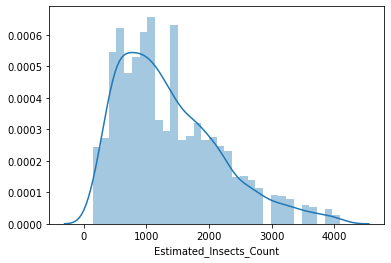

In [19]:
sns.distplot(AG_train['Estimated_Insects_Count'])

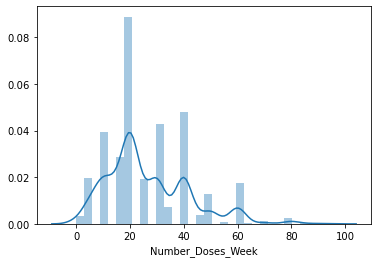

In [20]:
sns.distplot(AG_train['Number_Doses_Week'])

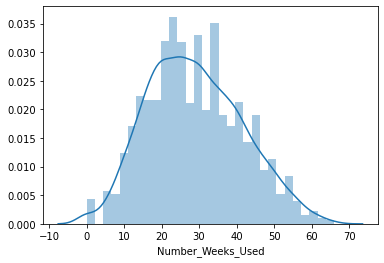

In [21]:
sns.distplot(AG_train['Number_Weeks_Used'])

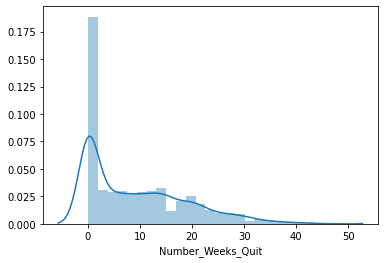

In [22]:
sns.distplot(AG_train['Number_Weeks_Quit'])

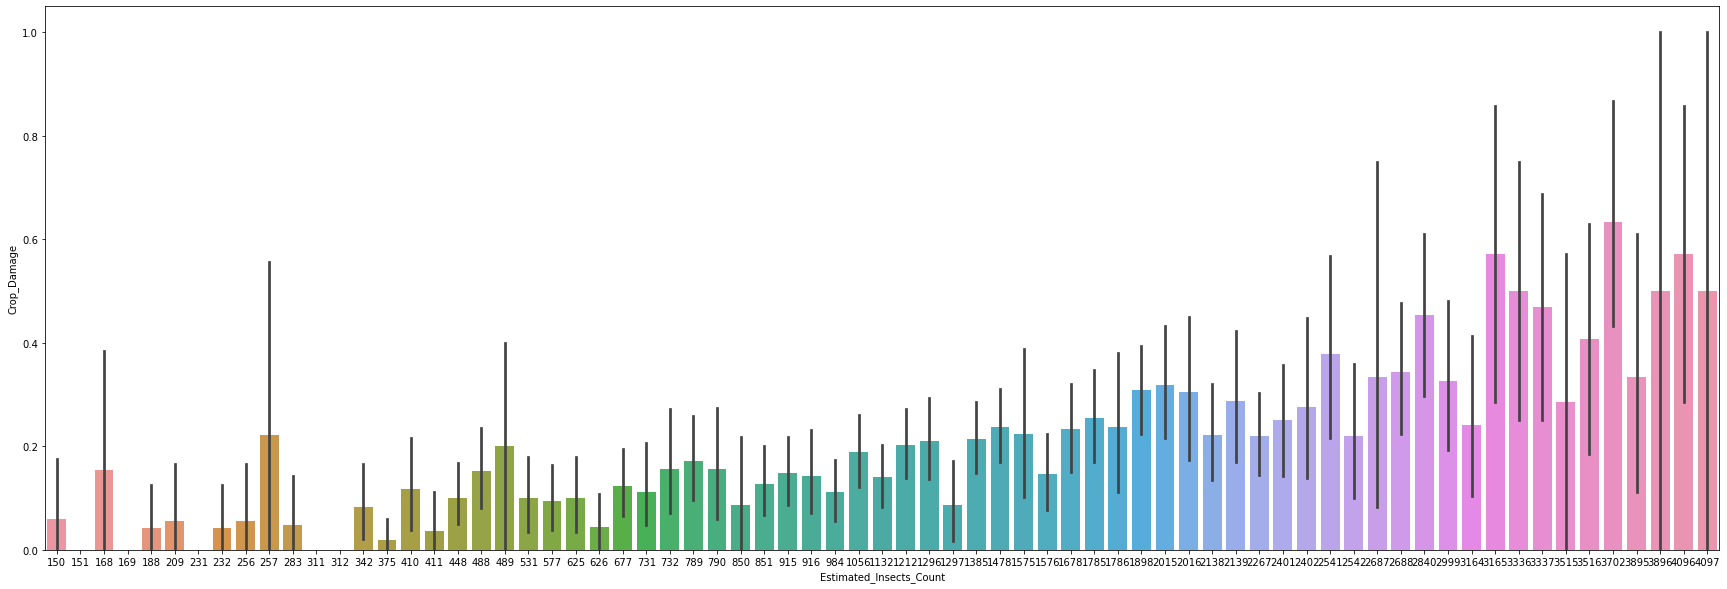

In [23]:
plt.figure(figsize=(30,10))
sns.barplot(AG_train['Estimated_Insects_Count'],AG_train['Crop_Damage'])

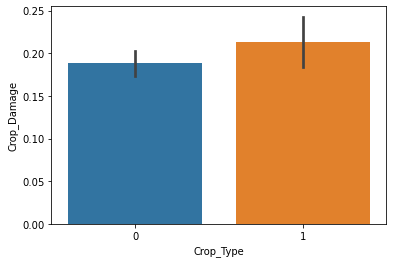

In [24]:
sns.barplot(AG_train['Crop_Type'],AG_train['Crop_Damage'])

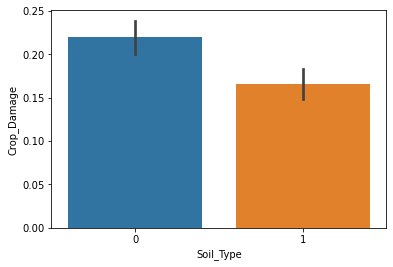

In [25]:
sns.barplot(AG_train['Soil_Type'],AG_train['Crop_Damage'])

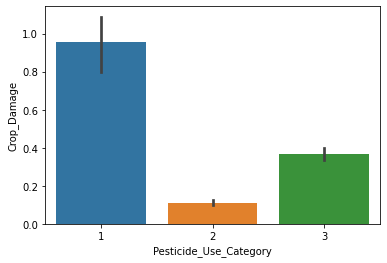

In [26]:
sns.barplot(AG_train['Pesticide_Use_Category'],AG_train['Crop_Damage'])

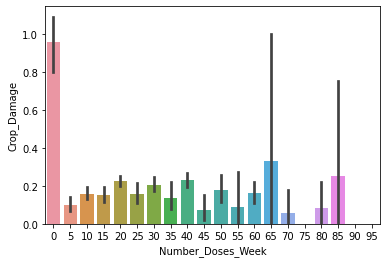

In [27]:
sns.barplot(AG_train['Number_Doses_Week'],AG_train['Crop_Damage'])

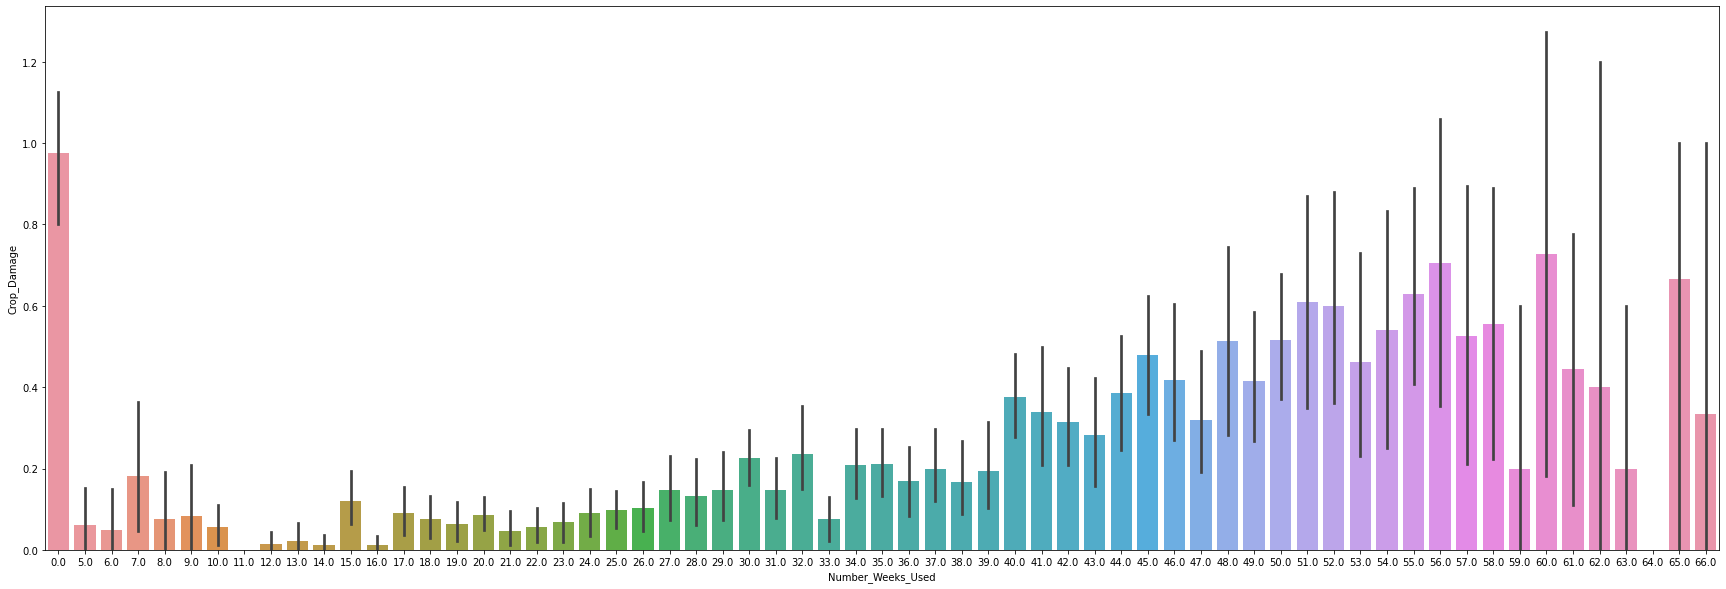

In [28]:
plt.figure(figsize=(30,10))
sns.barplot(AG_train['Number_Weeks_Used'],AG_train['Crop_Damage'])

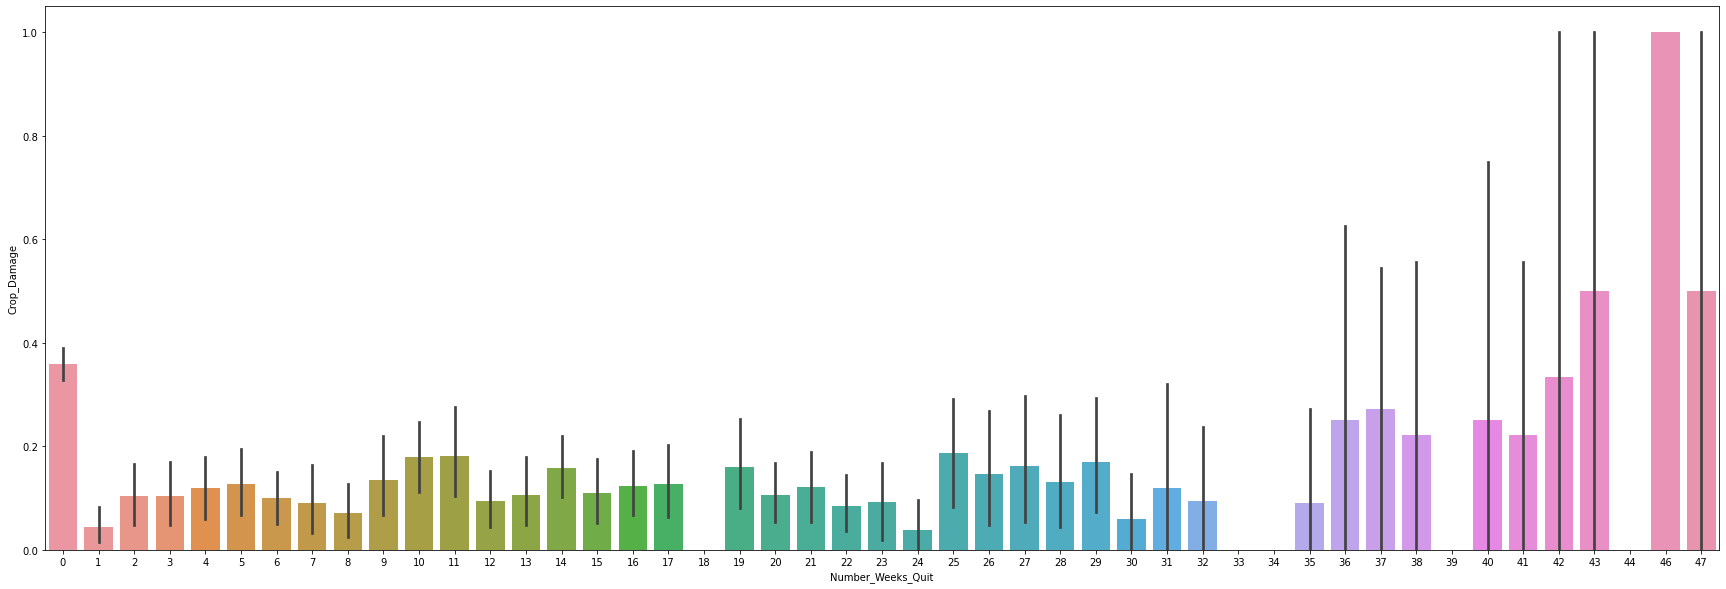

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(AG_train['Number_Weeks_Quit'],AG_train['Crop_Damage'])

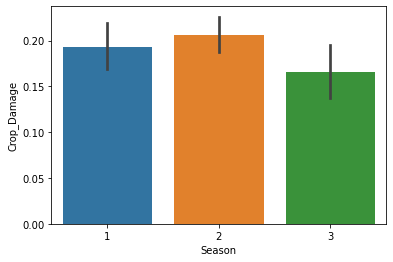

In [30]:
sns.barplot(AG_train['Season'],AG_train['Crop_Damage'])

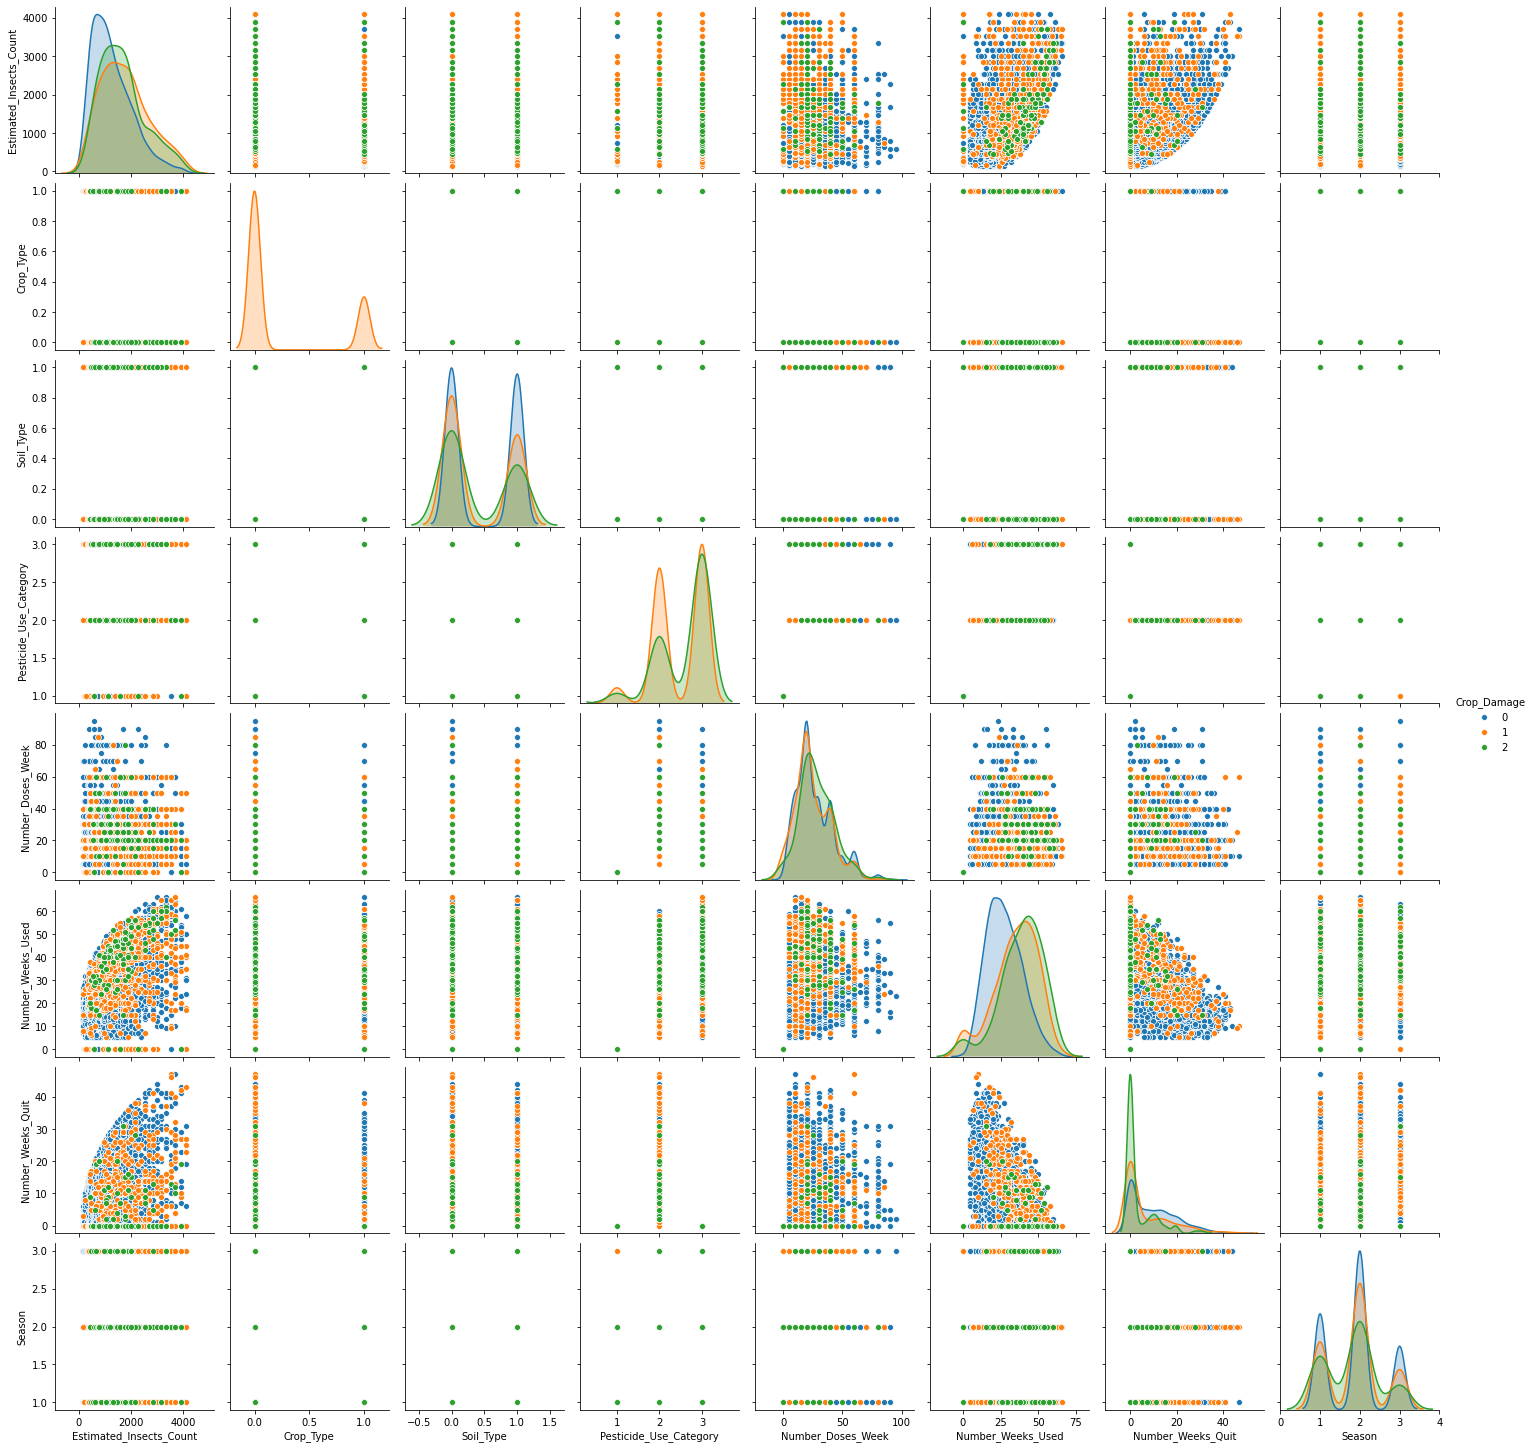

In [31]:
sns.pairplot(AG_train,hue='Crop_Damage')

In [32]:
AG_train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


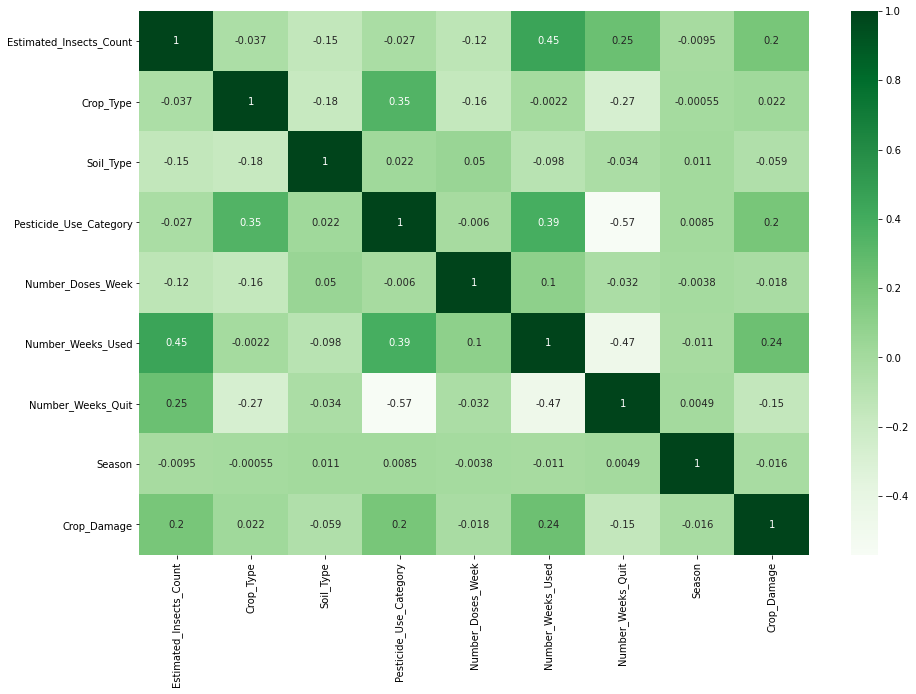

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(AG_train.corr(),cmap='Greens',annot=True)

In [34]:
AG_train1=AG_train.drop(columns=['ID'],axis=1)

In [35]:
AG_train1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [36]:
AG_train1.shape

(4599, 9)

In [37]:
AG_train1.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [38]:
AG_train1['Number_Weeks_Used'].fillna(AG_train1['Number_Weeks_Used'].mean(),inplace=True)

In [41]:
AG_train1.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [42]:
AG_train1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [43]:
AG_train1.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

Estimated_Insects_Count       AxesSubplot(0.125,0.125;0.0731132x0.755)
Crop_Type                  AxesSubplot(0.212736,0.125;0.0731132x0.755)
Soil_Type                  AxesSubplot(0.300472,0.125;0.0731132x0.755)
Pesticide_Use_Category     AxesSubplot(0.388208,0.125;0.0731132x0.755)
Number_Doses_Week          AxesSubplot(0.475943,0.125;0.0731132x0.755)
Number_Weeks_Used          AxesSubplot(0.563679,0.125;0.0731132x0.755)
Number_Weeks_Quit          AxesSubplot(0.651415,0.125;0.0731132x0.755)
Season                     AxesSubplot(0.739151,0.125;0.0731132x0.755)
Crop_Damage                AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

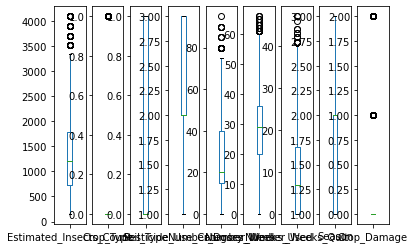

In [44]:
AG_train1.plot(kind='box',subplots=True)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [46]:
x=AG_train1.drop(columns=['Crop_Damage'],axis=1)
y=AG_train1['Crop_Damage']


In [47]:
print(x.head())
print(y.head())

   Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                      188          1          0                       1   
1                      209          1          0                       1   
2                      257          1          0                       1   
3                      257          1          1                       1   
4                      342          1          0                       1   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  
0                  0                0.0                  0       1  
1                  0                0.0                  0       2  
2                  0                0.0                  0       2  
3                  0                0.0                  0       2  
4                  0                0.0                  0       2  
0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64


In [48]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=39,stratify=y)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3679, 8)
(920, 8)
(3679,)
(920,)


In [51]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 23}


In [52]:
parameters={'C':[1,10],'random_state': range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [53]:
KNN=KNeighborsClassifier(n_neighbors=23)
SVC=SVC()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
LR=LogisticRegression(random_state=42)

In [54]:
model=[LR,RFC,KNN,DTC,SVC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score Of', m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('****************************************************************')
    print('\n')

Accuracy Score Of LogisticRegression(random_state=42) is:
0.8184782608695652
[[749  15   0]
 [129   4   0]
 [ 22   1   0]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       764
           1       0.20      0.03      0.05       133
           2       0.00      0.00      0.00        23

    accuracy                           0.82       920
   macro avg       0.34      0.34      0.32       920
weighted avg       0.72      0.82      0.76       920

****************************************************************


Accuracy Score Of RandomForestClassifier() is:
0.8206521739130435
[[734  27   3]
 [110  21   2]
 [ 17   6   0]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       764
           1       0.39      0.16      0.22       133
           2       0.00      0.00      0.00        23

    accuracy                           0.82       920
   macro avg       0.41      0.37      0.38  

In [55]:
AG_test=pd.read_csv('test_agriculture.csv')
AG_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [56]:
AG_test.shape

(1199, 9)

In [57]:
AG_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [58]:
AG_test['Number_Weeks_Used'].fillna(AG_test['Number_Weeks_Used'].mean(),inplace=True)

In [59]:
AG_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [60]:
AG_test1=AG_test.drop(columns=['ID'],axis=1)

In [61]:
AG_test1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1


In [68]:
x=AG_train1.drop(columns=['Crop_Damage'],axis=1)
y=AG_train1['Crop_Damage']


In [69]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=39,stratify=y)

In [77]:
model=[SVC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(AG_test1)
    print(predm)
    

[0 0 0 ... 0 0 0]
